### Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os 

### Getting the train and test data

In [2]:
train_data_path = os.path.join('split_data_for_arima', 'train.csv')
test_data_path = os.path.join('split_data_for_arima', 'test.csv')

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)

train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)

test_data['Date'] = pd.to_datetime(test_data['Date'])
test_data.set_index('Date', inplace=True)

#### Loading Models

In [3]:
best_rmse_model_path = os.path.join('models', f'best_rmse_arima_model.joblib')
best_aic_model_path = os.path.join('models', f'best_aic_arima_model.joblib')
best_bic_model_path = os.path.join('models', f'best_bic_arima_model.joblib')

In [4]:
best_rmse_model = joblib.load(best_rmse_model_path)
best_aic_model = joblib.load(best_aic_model_path)
best_bic_model = joblib.load(best_bic_model_path)

In [10]:
print(f'ARIMA model with best RMSE has the order of: {best_rmse_model.specification.order}')
print(f'ARIMA model with best AIC has the order of: {best_aic_model.specification.order}')
print(f'ARIMA model with best BIC has the order of: {best_bic_model.specification.order}')

ARIMA model with best RMSE has the order of: (3, 1, 3)
ARIMA model with best AIC has the order of: (2, 1, 3)
ARIMA model with best BIC has the order of: (2, 1, 3)


In [11]:
train_size = len(train_data)
test_size = len(test_data)

### Forecasting the Values

#### 1. Model with best RMSE score

In [12]:
forecast = best_rmse_model.forecast(steps=test_size)  # Forecasting test data values

# Convert back to original scale
last_value = train_data['Close'].iloc[-1]
predicted_values = [last_value + sum(forecast[:i+1]) for i in range(len(forecast))]

c:\Projects\Time seies\Tesla-stock-price-time-series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Projects\Time seies\Tesla-stock-price-time-series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#### Visualising the Predictions

C:\Users\ARITRA\AppData\Local\Temp\ipykernel_19920\2981769619.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


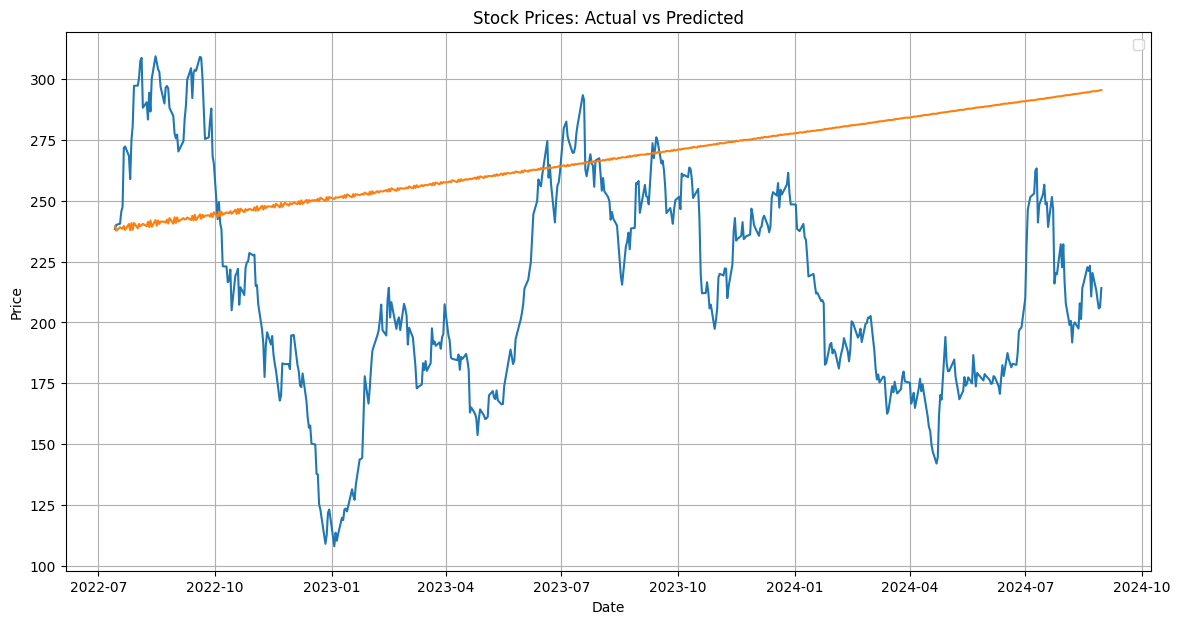

In [13]:
plt.figure(figsize=(14, 7))

sns.lineplot(x=test_data.index, y="Close", data=test_data)
sns.lineplot(x=test_data.index, y=predicted_values)

plt.title('Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

#### 2. Model with best AIC

In [14]:
forecast = best_aic_model.forecast(steps=test_size)  # Forecasting test data values

# Convert back to original scale
last_value = train_data['Close'].iloc[-1]
predicted_values = [last_value + sum(forecast[:i+1]) for i in range(len(forecast))]

c:\Projects\Time seies\Tesla-stock-price-time-series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Projects\Time seies\Tesla-stock-price-time-series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#### Visualising the Predictions

C:\Users\ARITRA\AppData\Local\Temp\ipykernel_19920\2981769619.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


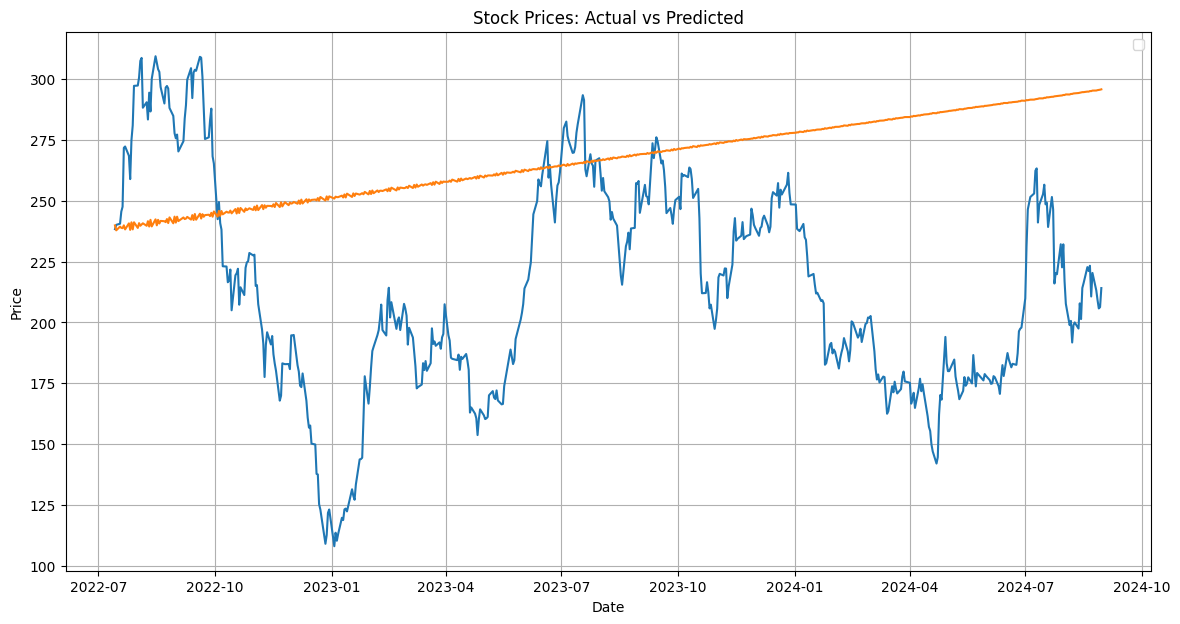

In [16]:
plt.figure(figsize=(14, 7))

sns.lineplot(x=test_data.index, y="Close", data=test_data)
sns.lineplot(x=test_data.index, y=predicted_values)

plt.title('Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

#### 2. Model with best BIC

In [17]:
forecast = best_bic_model.forecast(steps=test_size)  # Forecasting test data values

# Convert back to original scale
last_value = train_data['Close'].iloc[-1]
predicted_values = [last_value + sum(forecast[:i+1]) for i in range(len(forecast))]

c:\Projects\Time seies\Tesla-stock-price-time-series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Projects\Time seies\Tesla-stock-price-time-series\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#### Visualising the Predictions

C:\Users\ARITRA\AppData\Local\Temp\ipykernel_19920\2981769619.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


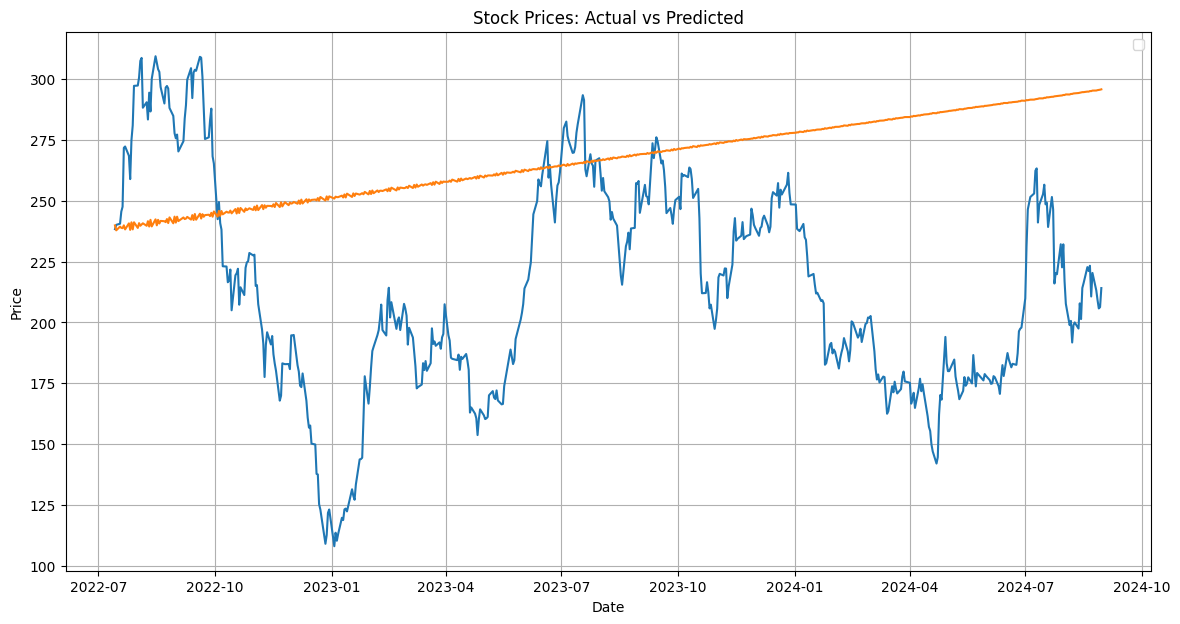

In [18]:
plt.figure(figsize=(14, 7))

sns.lineplot(x=test_data.index, y="Close", data=test_data)
sns.lineplot(x=test_data.index, y=predicted_values)

plt.title('Stock Prices: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

Therefore, we can see that ARIMA models are not working properly even if the First Difference of the Time Series is Stationary.